In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('premierLeague1920.xlsx')

In [3]:
df.head()

,Match_Name,Match_Date,Team,Team_Logo,Manager,Captain,Score,Penalties,Fouls,Corners,...,Possession,PassingAccuracy,SucPass,NumofPass,ShotsAccuracy,SucShots,NumofShots,SavesAccuracy,SucSaves,NumofSaves
0,Liverpool vs. Norwich City,2019-08-09,Liverpool,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Jürgen Klopp,Jordan Henderson,4,0,10,11,...,0.57,0,409,521,0.47,7,15,0.83,5,6
1,Liverpool vs. Norwich City,2019-08-09,Norwich City,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Daniel Farke,Grant Hanley,1,0,12,2,...,0.43,0,304,395,0.46,6,13,0.42,3,7
2,West Ham United vs. Manchester City,2019-08-10,West Ham United,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Manuel Pellegrini,Aaron Cresswell,0,0,11,1,...,0.43,0,347,428,0.60,3,5,0.50,4,8
3,West Ham United vs. Manchester City,2019-08-10,Manchester City,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Pep Guardiola,David Silva,5,0,15,1,...,0.57,0,495,564,0.62,8,13,1.00,3,3
4,Burnley vs. Southampton,2019-08-10,Burnley,https://d2p3bygnnzw9w3.cloudfront.net/req/2020...,Sean Dyche,Ben Mee,3,0,6,2,...,0.46,0,214,346,0.44,4,9,1.00,3,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Match_Name       760 non-null    object        
 1   Match_Date       760 non-null    datetime64[ns]
 2   Team             760 non-null    object        
 3   Team_Logo        760 non-null    object        
 4   Manager          760 non-null    object        
 5   Captain          760 non-null    object        
 6   Score            760 non-null    int64         
 7   Penalties        760 non-null    int64         
 8   Fouls            760 non-null    int64         
 9   Corners          760 non-null    int64         
 10  Crosses          760 non-null    int64         
 11  Touches          760 non-null    int64         
 12  Tackles          760 non-null    int64         
 13  Interceptions    760 non-null    int64         
 14  Aerials Won      760 non-null    int64    

In [5]:
df.drop(['Team_Logo','Manager','Captain'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Match_Name       760 non-null    object        
 1   Match_Date       760 non-null    datetime64[ns]
 2   Team             760 non-null    object        
 3   Score            760 non-null    int64         
 4   Penalties        760 non-null    int64         
 5   Fouls            760 non-null    int64         
 6   Corners          760 non-null    int64         
 7   Crosses          760 non-null    int64         
 8   Touches          760 non-null    int64         
 9   Tackles          760 non-null    int64         
 10  Interceptions    760 non-null    int64         
 11  Aerials Won      760 non-null    int64         
 12  Clearances       760 non-null    int64         
 13  Offsides         760 non-null    int64         
 14  Goal Kicks       760 non-null    int64    

In [7]:
pattern = r'\bLiverpool\b'
lfc = df[df['Match_Name'].str.contains(pattern)]

In [8]:
lfc

,Match_Name,Match_Date,Team,Score,Penalties,Fouls,Corners,Crosses,Touches,Tackles,...,Possession,PassingAccuracy,SucPass,NumofPass,ShotsAccuracy,SucShots,NumofShots,SavesAccuracy,SucSaves,NumofSaves
0,Liverpool vs. Norwich City,2019-08-09,Liverpool,4,0,10,11,15,633,24,...,0.57,0,409,521,0.47,7,15,0.83,5,6
1,Liverpool vs. Norwich City,2019-08-09,Norwich City,1,0,12,2,5,537,17,...,0.43,0,304,395,0.46,6,13,0.42,3,7
22,Southampton vs. Liverpool,2019-08-17,Southampton,1,0,12,5,11,474,21,...,0.37,0,225,335,0.27,3,11,0.60,3,5
23,Southampton vs. Liverpool,2019-08-17,Liverpool,2,0,9,9,16,699,4,...,0.63,0,442,565,0.33,5,15,0.66,2,3
52,Liverpool vs. Arsenal,2019-08-24,Liverpool,3,0,11,6,24,697,24,...,0.52,0,492,578,0.17,4,24,0.66,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Arsenal vs. Liverpool,2020-07-15,Liverpool,1,0,10,13,17,777,10,...,0.69,0,565,673,0.33,8,24,0.00,0,2
738,Liverpool vs. Chelsea,2020-07-22,Liverpool,5,0,12,6,6,713,18,...,0.51,0,490,616,0.70,7,10,0.40,2,5
739,Liverpool vs. Chelsea,2020-07-22,Chelsea,3,0,14,0,15,711,13,...,0.49,0,488,591,0.50,5,10,0.28,2,7
758,Newcastle United vs. Liverpool,2020-07-26,Newcastle United,1,0,14,2,3,404,31,...,0.25,0,192,285,0.67,2,3,0.50,3,6


In [9]:
pattern = r'\bLiverpool\b'
opp_df =lfc[~lfc['Team'].str.contains(pattern)]

In [10]:
opp_df.head()

,Match_Name,Match_Date,Team,Score,Penalties,Fouls,Corners,Crosses,Touches,Tackles,...,Possession,PassingAccuracy,SucPass,NumofPass,ShotsAccuracy,SucShots,NumofShots,SavesAccuracy,SucSaves,NumofSaves
1,Liverpool vs. Norwich City,2019-08-09,Norwich City,1,0,12,2,5,537,17,...,0.43,0,304,395,0.46,6,13,0.42,3,7
22,Southampton vs. Liverpool,2019-08-17,Southampton,1,0,12,5,11,474,21,...,0.37,0,225,335,0.27,3,11,0.60,3,5
53,Liverpool vs. Arsenal,2019-08-24,Arsenal,1,0,6,4,8,671,19,...,0.48,0,451,531,0.33,3,9,0.50,2,4
74,Burnley vs. Liverpool,2019-08-31,Burnley,0,0,14,6,8,451,8,...,0.37,0,211,337,0.29,2,7,0.50,3,6
81,Liverpool vs. Newcastle United,2019-09-14,Newcastle United,1,0,8,1,5,442,21,...,0.27,0,220,320,0.13,1,8,0.62,5,8


In [11]:
opp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 1 to 758
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Match_Name       38 non-null     object        
 1   Match_Date       38 non-null     datetime64[ns]
 2   Team             38 non-null     object        
 3   Score            38 non-null     int64         
 4   Penalties        38 non-null     int64         
 5   Fouls            38 non-null     int64         
 6   Corners          38 non-null     int64         
 7   Crosses          38 non-null     int64         
 8   Touches          38 non-null     int64         
 9   Tackles          38 non-null     int64         
 10  Interceptions    38 non-null     int64         
 11  Aerials Won      38 non-null     int64         
 12  Clearances       38 non-null     int64         
 13  Offsides         38 non-null     int64         
 14  Goal Kicks       38 non-null     int64     

In [12]:
pattern = r'\bLiverpool\b'
home_df = lfc[lfc['Team'].str.contains(pattern)]
home_df.head()

,Match_Name,Match_Date,Team,Score,Penalties,Fouls,Corners,Crosses,Touches,Tackles,...,Possession,PassingAccuracy,SucPass,NumofPass,ShotsAccuracy,SucShots,NumofShots,SavesAccuracy,SucSaves,NumofSaves
0,Liverpool vs. Norwich City,2019-08-09,Liverpool,4,0,10,11,15,633,24,...,0.57,0,409,521,0.47,7,15,0.83,5,6
23,Southampton vs. Liverpool,2019-08-17,Liverpool,2,0,9,9,16,699,4,...,0.63,0,442,565,0.33,5,15,0.66,2,3
52,Liverpool vs. Arsenal,2019-08-24,Liverpool,3,0,11,6,24,697,24,...,0.52,0,492,578,0.17,4,24,0.66,2,3
75,Burnley vs. Liverpool,2019-08-31,Liverpool,3,0,16,4,17,687,14,...,0.63,0,448,581,0.40,6,15,1.00,2,2
80,Liverpool vs. Newcastle United,2019-09-14,Liverpool,3,0,5,10,20,989,15,...,0.73,0,769,866,0.40,8,20,0.00,0,1


In [13]:
home_df.isnull().sum()

Match_Name         0
Match_Date         0
Team               0
Score              0
Penalties          0
Fouls              0
Corners            0
Crosses            0
Touches            0
Tackles            0
Interceptions      0
Aerials Won        0
Clearances         0
Offsides           0
Goal Kicks         0
Throw Ins          0
Long Balls         0
YellowCard         0
RedCard            0
YellowRed          0
Possession         0
PassingAccuracy    0
SucPass            0
NumofPass          0
ShotsAccuracy      0
SucShots           0
NumofShots         0
SavesAccuracy      0
SucSaves           0
NumofSaves         0
dtype: int64

In [14]:
opp_df.isnull().sum()

Match_Name         0
Match_Date         0
Team               0
Score              0
Penalties          0
Fouls              0
Corners            0
Crosses            0
Touches            0
Tackles            0
Interceptions      0
Aerials Won        0
Clearances         0
Offsides           0
Goal Kicks         0
Throw Ins          0
Long Balls         0
YellowCard         0
RedCard            0
YellowRed          0
Possession         0
PassingAccuracy    0
SucPass            0
NumofPass          0
ShotsAccuracy      0
SucShots           0
NumofShots         0
SavesAccuracy      0
SucSaves           0
NumofSaves         0
dtype: int64

In [15]:
offside = opp_df['Offsides']
offside = list(offside)

#successful offside traps set by LFC

In [16]:
fouls = home_df['Fouls']
fouls = list(fouls)

# fouls commited by LFC players

In [17]:
yellow = home_df['YellowCard']
yellow = list(yellow)

#yellow card(s) given to LFC players

In [18]:
red = home_df['RedCard']
red = list(red)

#red card(s) given to LFC players

In [19]:
tackles = home_df['Tackles']
tackles = list(tackles)

#tackles made by LFC players

In [20]:
saves = home_df['NumofSaves']
saves = list(saves)

#saves made by LFC GKs

In [21]:
corners = home_df['Corners']
corners = list(corners)

#corners conceded by LFC 

In [22]:
goals = home_df['Score']
goals = list(goals)

#goals scored by LFC

In [23]:
goals_allowed = opp_df['Score']
goals_allowed =  list(goals_allowed)

#goals conceded by LFC

In [24]:
shots = home_df['NumofShots']
shots = list(shots)

#shots by LFC players

In [25]:
# conversion_rate = goals/shots
# conversion_rate.count()

In [26]:
possession = round(home_df['Possession'] *100)
possession = list(possession)

#LFC possession stat

In [27]:
pass_accuracy = round((home_df['SucPass'])/(home_df['NumofPass']) *100)
pass_accuracy = list(pass_accuracy)

#LFC pass accuracy stat

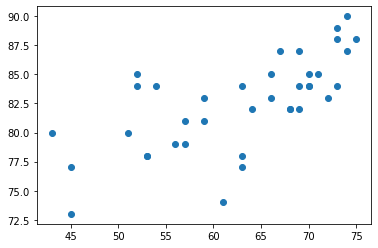

In [28]:
plt.scatter(possession, pass_accuracy) 

#to check if there is a correlation between passing accuracy and possession

In [29]:
df1 = pd.read_csv('understat_Liverpool1920.csv')

In [30]:
df1.head()

,date,deep,deep_allowed,draws,h_a,loses,missed,npxG,npxGA,npxGD,ppda,ppda_allowed,pts,result,scored,wins,xG,xGA,xpts
0,2019-08-09 20:00:00,11,5,0,h,0,1,2.23456,0.842407,1.392153,"{'att': 208, 'def': 35}","{'att': 236, 'def': 11}",3,w,4,1,2.23456,0.842407,2.3863
1,2019-08-17 15:00:00,6,1,0,a,0,1,1.52022,2.140470,-0.620250,"{'att': 132, 'def': 14}","{'att': 288, 'def': 24}",3,w,2,1,1.52022,2.140470,0.9463
2,2019-08-24 17:30:00,9,7,0,h,0,1,2.02704,0.985542,1.041498,"{'att': 362, 'def': 37}","{'att': 199, 'def': 7}",3,w,3,1,2.78821,0.985542,2.5205
3,2019-08-31 17:30:00,11,0,0,a,0,0,1.20057,0.617390,0.583180,"{'att': 149, 'def': 24}","{'att': 309, 'def': 19}",3,w,3,1,1.20057,0.617390,1.8342
4,2019-09-14 11:30:00,19,4,0,h,0,1,2.93281,0.291073,2.641737,"{'att': 167, 'def': 24}","{'att': 419, 'def': 10}",3,w,3,1,2.93281,0.291073,2.8820


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          38 non-null     object 
 1   deep          38 non-null     int64  
 2   deep_allowed  38 non-null     int64  
 3   draws         38 non-null     int64  
 4   h_a           38 non-null     object 
 5   loses         38 non-null     int64  
 6   missed        38 non-null     int64  
 7   npxG          38 non-null     float64
 8   npxGA         38 non-null     float64
 9   npxGD         38 non-null     float64
 10  ppda          38 non-null     object 
 11  ppda_allowed  38 non-null     object 
 12  pts           38 non-null     int64  
 13  result        38 non-null     object 
 14  scored        38 non-null     int64  
 15  wins          38 non-null     int64  
 16  xG            38 non-null     float64
 17  xGA           38 non-null     float64
 18  xpts          38 non-null     fl

In [32]:
df1.isnull().sum() #to check for null values, column wise

date            0
deep            0
deep_allowed    0
draws           0
h_a             0
loses           0
missed          0
npxG            0
npxGA           0
npxGD           0
ppda            0
ppda_allowed    0
pts             0
result          0
scored          0
wins            0
xG              0
xGA             0
xpts            0
dtype: int64

In [33]:
final_third = df1['deep']
final_third = list(final_third)

#Number of plays in opponent final third

In [34]:
final_third_allowed = df1['deep_allowed']
final_third_allowed = list(final_third_allowed)

#Number of plays in Liverpool's final third

In [35]:
# pressing = df1['ppda']
# import ast
# def convert_to_dict(pressing):
#     dis = ast.literal_eval(pressing)
#     return dis['att']/dis['def']

# pressing = pressing.apply(convert_to_dict)

pressing = df1['ppda']
import ast
def convert_to_dict(pressing):
    dis = ast.literal_eval(pressing)
    return dis['att']/dis['def']

pressing = pressing.apply(convert_to_dict)
pressing = list(pressing)

#pressing stat by LFC

In [36]:
pressing_allowed = df1['ppda_allowed']
import ast
def convert_to_dict(pressing_allowed):
    dis = ast.literal_eval(pressing_allowed)
    return dis['att']/dis['def']

pressing_allowed = pressing_allowed.apply(convert_to_dict)
pressing_allowed = list(pressing_allowed)

#pressing stat against LFC

In [37]:
points = df1['pts']
points = list(points)

#points gotten by LFC in the 19/20 season

In [38]:
lfc_1920 = pd.DataFrame({'points':points,'goals':goals,'goals_allowed':goals_allowed,'shots':shots,'final_third':final_third,'pressing':pressing,'pressing_allowed':pressing_allowed,'possession':possession,'pass_accuracy':pass_accuracy,'final_third_allowed':final_third_allowed,'tackles':tackles,'fouls':fouls,'offside':offside,'saves':saves,'corners':corners,'yellow':yellow,'red':red,})

In [39]:
lfc_1920

,points,goals,goals_allowed,shots,final_third,pressing,pressing_allowed,possession,pass_accuracy,final_third_allowed,tackles,fouls,offside,saves,corners,yellow,red
0,3,4,1,15,11,5.942857,21.454545,57.0,79.0,5,24,10,4,6,11,0,0
1,3,2,1,15,6,9.428571,12.000000,63.0,78.0,1,4,9,4,3,9,1,0
2,3,3,1,24,9,9.783784,28.428571,52.0,85.0,7,24,11,5,3,6,1,0
3,3,3,0,15,11,6.208333,16.263158,63.0,77.0,0,14,16,5,2,4,0,0
4,3,3,1,20,19,6.958333,41.900000,73.0,89.0,4,15,5,8,1,10,0,0
5,3,2,1,6,5,7.914286,11.625000,45.0,73.0,5,9,12,7,2,3,3,0
6,3,1,0,16,11,11.272727,24.235294,70.0,85.0,1,15,4,0,2,5,1,0
7,3,2,1,17,12,7.781250,9.250000,53.0,78.0,4,16,10,2,1,4,1,0
8,1,1,1,10,7,5.172414,31.500000,66.0,85.0,1,22,15,4,2,1,1,0
9,3,2,1,20,13,5.068966,32.300000,66.0,83.0,4,24,11,4,4,8,3,0


In [40]:
lfc_1920.to_csv('lfc_1920.csv', index=False)